In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [22]:
secretnumber = '11'

In [23]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for index,yesno in enumerate(reversed(secretnumber)):
  if yesno == '1':
    circuit.cx(index,len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)) , range(len(secretnumber)))

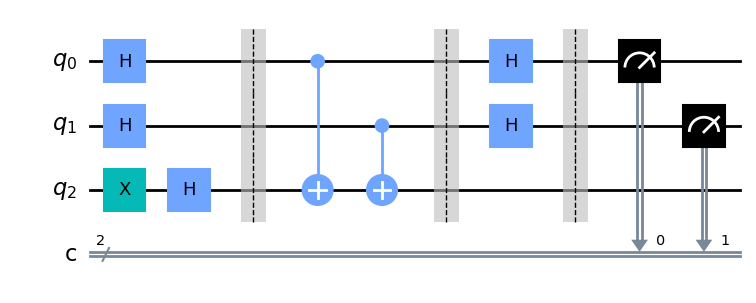

In [24]:
circuit.draw('mpl')

In [25]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots=1).result()
counts = result.get_counts()
print(counts)

{'11': 1}
